In [25]:
import pandas as pd
import numpy as np
import string
import re
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#load dataset
sec_data=pd.read_csv("data_spam.csv",encoding='latin-1')

# **Data Preprocessing:**

In [48]:
sec_data.drop(sec_data.columns[[2,3,4]], axis=1, inplace=True)

In [49]:
sec_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [50]:
#turn letters to lower
sec_data["v2"]=sec_data["v2"].str.lower()
sec_data["v1"]=sec_data["v1"].str.lower()

In [51]:
sec_data

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


# Remove Punctuation:

In [52]:
sec_data["v2"] = sec_data["v2"].str.translate(str.maketrans('õ£û÷å','      ', string.punctuation))

In [53]:
sec_data

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


# Remove Stopwords,Tokenizetion,Lemmatizetion

In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer=WordNetLemmatizer()

def tokenize( text):
    input_str = text
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(input_str)
    result = [i for i in tokens if not i in stop_words]
    return  (result)

for index, row in sec_data.iterrows():
    temp = row['v2']
    row['v2']=tokenize(temp)
sec_data['v2'] = sec_data['v2'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
sec_data


,v1,v2
0,ham,"[g, o, , u, n, t, i, l, , j, u, r, o, n, g, ..."
1,ham,"[o, k, , l, a, r, , j, o, k, i, n, g, , w, ..."
2,spam,"[f, r, e, e, , e, n, t, r, y, , i, n, , 2, ..."
3,ham,"[u, , d, u, n, , s, a, y, , s, o, , e, a, ..."
4,ham,"[n, a, h, , i, , d, o, n, t, , t, h, i, n, ..."
...,...,...
5567,spam,"[t, h, i, s, , i, s, , t, h, e, , 2, n, d, ..."
5568,ham,"[w, i, l, l, , ì, , b, , g, o, i, n, g, , ..."
5569,ham,"[p, i, t, y, , , w, a, s, , i, n, , m, o, ..."
5570,ham,"[t, h, e, , g, u, y, , d, i, d, , s, o, m, ..."


# TfidfVectorizer

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
sec_data['v1']=sec_data.v1.map({'ham':1,'spam':0})
x=sec_data.v2
y=sec_data.v1
vectorizer = TfidfVectorizer(tokenizer=lambda text: text.split())
#tfidf_matrix = vectorizer.fit_transform(sec_data['v2'])
x = vectorizer.fit_transform([' '.join(doc) for doc in x])
#Get feature names (terms)
feature_names = vectorizer.get_feature_names_out()
#Create dataframe from TF-IDF matrix
x = pd.DataFrame(x.toarray(), columns=feature_names)
x.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,â,ä,è,ì,ï,ð,ò,ó,ô,ö
0,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.348998,0.34645,0.32472,0.0,0.071366,0.220611,0.0,0.159776,0.286019,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size = 0.3, random_state = 42)

h=MultinomialNB().fit(xtrain,ytrain)
pre=h.predict(xtest)
print("accuracy ",metrics.accuracy_score(ytest,pre))
print("precision ",metrics.precision_score(ytest,pre))
print("recall ",metrics.recall_score(ytest, pre))
print("f1 ",metrics.f1_score(ytest, pre))

accuracy  0.97188995215311
precision  0.9737196765498652
recall  0.9944941500344116
f1  0.9839972761321076


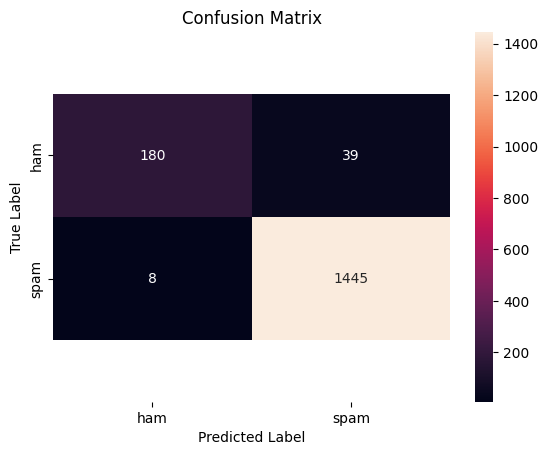

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(ytest, pre)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(xtrain, ytrain)

y_pred = rf_model.predict(xtest)

In [60]:
print("accuracy ",metrics.accuracy_score(ytest,y_pred))
print("precision ",metrics.precision_score(ytest,y_pred))
print("recall ",metrics.recall_score(ytest, y_pred))
print("f1 ",metrics.f1_score(ytest,y_pred))

accuracy  0.9826555023923444
precision  0.9830393487109905
recall  0.9972470750172058
f1  0.9900922446190639
